In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_json('C:/Users/Jay/Desktop/Python/Projects/SpotifyData/MyData/StreamingHistory0.json')
df.head()

,endTime,artistName,trackName,msPlayed
0,2019-05-02 16:02,All The Luck In The World,About the Ghosts,229306
1,2019-05-03 20:18,Cigarettes After Sex,K.,17911
2,2019-05-05 04:52,The 1975,Sincerity Is Scary,225955
3,2019-05-05 04:55,Parcels,Withorwithout,205033
4,2019-05-05 04:59,Blossoms,How Long Will This Last? - Single Mix,203208


## Top 20 Artists

In [3]:
d1=pd.DataFrame(df.groupby(['artistName'])['msPlayed'].sum().sort_values(ascending=False)[0:20])
d1.reset_index(inplace=True)
d1['hour'] = d1['msPlayed']/3.6e+6
d1.head()

,artistName,msPlayed,hour
0,Hariharan,60465355,16.795932
1,flora cash,50405744,14.001596
2,Cigarettes After Sex,46838549,13.010708
3,Guns N' Roses,31906604,8.862946
4,The Local Train,31757394,8.821498


Text(0.5, 1, '20 Most Listened Artists')

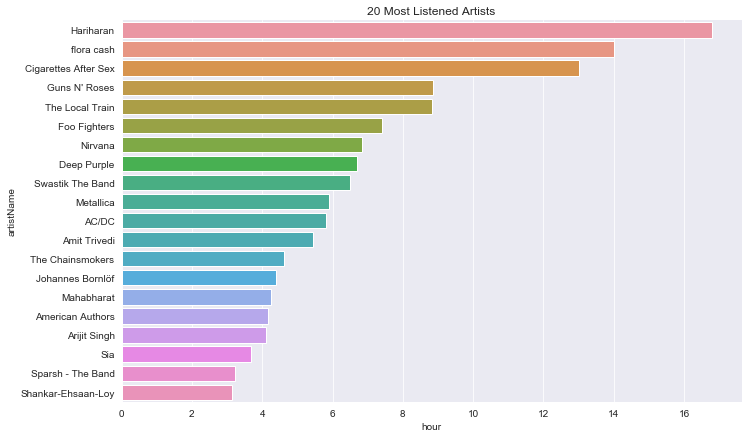

In [4]:
sns.set_style('darkgrid')
sns.catplot(x='hour', y='artistName', data=d1, kind='bar', height=6, aspect=7/4)
plt.title('20 Most Listened Artists')

## Top 20 Songs

In [5]:
d2=pd.DataFrame(df.groupby(['trackName'])['msPlayed'].sum().sort_values(ascending=False)[0:20])
d2.reset_index(inplace=True)
d2['hour'] = d1['msPlayed']/3.6e+6
d2.head()

,trackName,msPlayed,hour
0,Shree Hanuman Chalisa,60465355,16.795932
1,Something Just Like This,13137042,14.001596
2,Aaoge Tum Kabhi,11156061,13.010708
3,You Are Healing,10488225,8.862946
4,Apocalypse,10485038,8.821498


Text(0.5, 1, '20 Most Listened Songs')

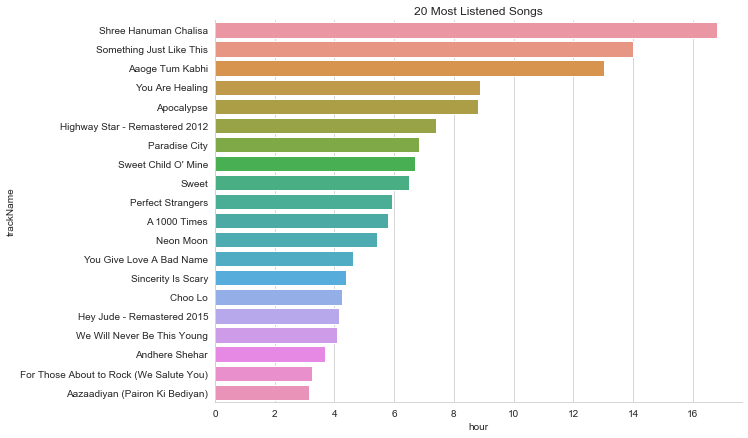

In [6]:
sns.set_style('whitegrid')
sns.catplot(x='hour', y='trackName', data=d2, kind='bar', height=6, aspect=7/4)
plt.title('20 Most Listened Songs')

## Time listened each month

In [7]:
d3=df

d3['endTime'] =pd.to_datetime(d3['endTime'])
d3['hour'] = d3['msPlayed']/3.6e+6

d3['month-year']=d3.endTime.map(lambda x: x.strftime('%B-%Y'))
d3

,endTime,artistName,trackName,msPlayed,hour,month-year
0,2019-05-02 16:02:00,All The Luck In The World,About the Ghosts,229306,0.063696,May-2019
1,2019-05-03 20:18:00,Cigarettes After Sex,K.,17911,0.004975,May-2019
2,2019-05-05 04:52:00,The 1975,Sincerity Is Scary,225955,0.062765,May-2019
3,2019-05-05 04:55:00,Parcels,Withorwithout,205033,0.056954,May-2019
4,2019-05-05 04:59:00,Blossoms,How Long Will This Last? - Single Mix,203208,0.056447,May-2019
...,...,...,...,...,...,...
8355,2020-05-04 19:35:00,Cigarettes After Sex,Young & Dumb,273811,0.076059,May-2020
8356,2020-05-04 19:39:00,Cigarettes After Sex,Falling In Love,245840,0.068289,May-2020
8357,2020-05-04 19:40:00,Cigarettes After Sex,Each Time You Fall in Love,29266,0.008129,May-2020
8358,2020-05-04 19:43:00,Cigarettes After Sex,Neon Moon,225745,0.062707,May-2020


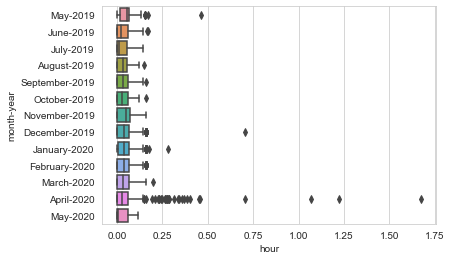

In [8]:
sns.boxplot(x='hour', y='month-year', data=d3)

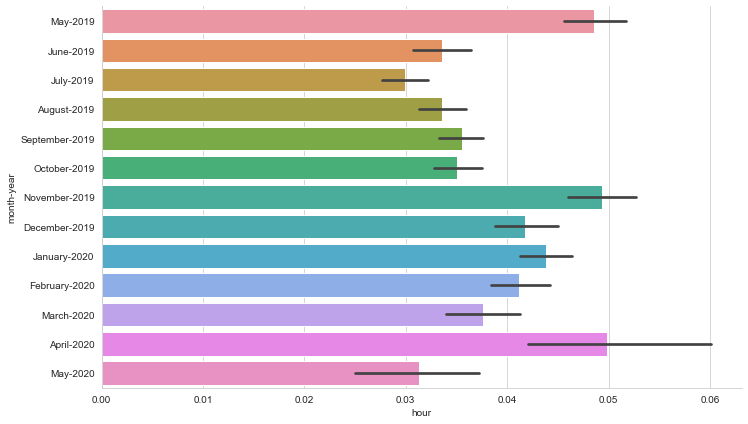

In [9]:
sns.catplot(x='hour', y='month-year', data=d3, kind='bar', height=6, aspect=7/4)

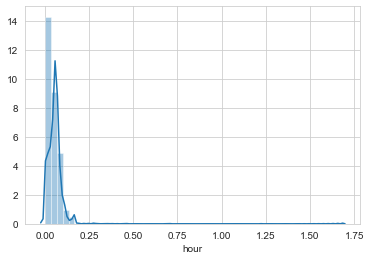

In [10]:
sns.distplot(d3['hour'])

## Time listened on each day of April 2020

In [11]:
d4=df

d4['endTime'] =pd.to_datetime(d4['endTime'])

d4['day-month']=d3.endTime.map(lambda x: x.strftime('%B-%d'))
d3

,endTime,artistName,trackName,msPlayed,hour,month-year,day-month
0,2019-05-02 16:02:00,All The Luck In The World,About the Ghosts,229306,0.063696,May-2019,May-02
1,2019-05-03 20:18:00,Cigarettes After Sex,K.,17911,0.004975,May-2019,May-03
2,2019-05-05 04:52:00,The 1975,Sincerity Is Scary,225955,0.062765,May-2019,May-05
3,2019-05-05 04:55:00,Parcels,Withorwithout,205033,0.056954,May-2019,May-05
4,2019-05-05 04:59:00,Blossoms,How Long Will This Last? - Single Mix,203208,0.056447,May-2019,May-05
...,...,...,...,...,...,...,...
8355,2020-05-04 19:35:00,Cigarettes After Sex,Young & Dumb,273811,0.076059,May-2020,May-04
8356,2020-05-04 19:39:00,Cigarettes After Sex,Falling In Love,245840,0.068289,May-2020,May-04
8357,2020-05-04 19:40:00,Cigarettes After Sex,Each Time You Fall in Love,29266,0.008129,May-2020,May-04
8358,2020-05-04 19:43:00,Cigarettes After Sex,Neon Moon,225745,0.062707,May-2020,May-04


In [12]:
d5=d4[d4['day-month'].str.contains('April')]
d5.drop(['endTime','month-year'],1, inplace=True)
d5['mins'] = d5['hour'] * 60
d5

C:\Users\Jay\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Jay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,artistName,trackName,msPlayed,hour,day-month,mins
7641,Margaretha van Baarle,Op Die Fiets,141204,0.039223,April-02,2.353400
7642,Alexandra Zvereca,Grandma's Place,116689,0.032414,April-02,1.944817
7643,Jean Willneuve,Comme un tableau,124437,0.034566,April-02,2.073950
7644,Oddur Klemenzson,Landmannalaugar,133687,0.037135,April-02,2.228117
7645,Fouad Elalamy,Reverence,119695,0.033249,April-02,1.994917
...,...,...,...,...,...,...
8237,13 Minutes to the Moon,T-minus 4: Apollo 11,65515,0.018199,April-30,1.091917
8238,13 Minutes to the Moon,T-minus 3,183902,0.051084,April-30,3.065033
8239,13 Minutes to the Moon,T-minus 1,24353,0.006765,April-30,0.405883
8240,13 Minutes to the Moon,T-minus 2,58514,0.016254,April-30,0.975233


Text(0.5, 1, 'Time spent in April')

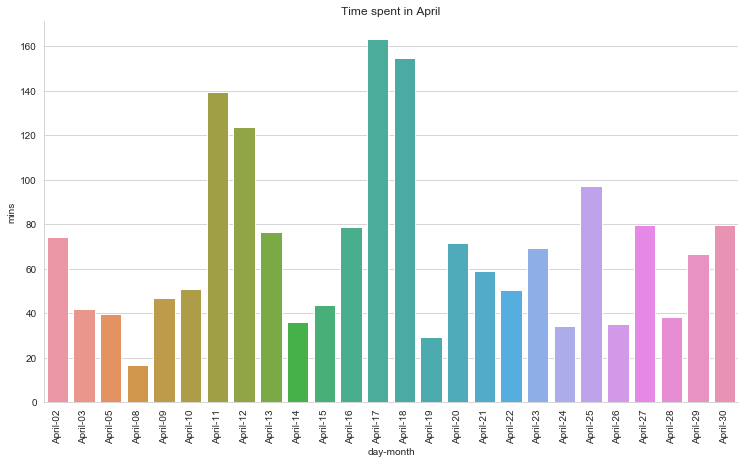

In [13]:
sns.catplot(x='day-month', y='mins', data=d5, kind='bar', height=6, aspect=7/4, ci=None, estimator=sum)
plt.xticks(rotation=90)
plt.title('Time spent in April')

In [14]:
d5[d5['day-month'] == 'April-17']

,artistName,trackName,msPlayed,hour,day-month,mins
7878,Mahabharat,#4 The courtmen in all of us,1136763,0.315767,April-17,18.946050
7879,Mahabharat,#5 The Draupadi in all of us,75093,0.020859,April-17,1.251550
7880,Mahabharat,#5 The Draupadi in all of us,522,0.000145,April-17,0.008700
7881,Mahabharat,#6 How humanity lost at a game of chausar,18562,0.005156,April-17,0.309367
7882,Mahabharat,#5 The Draupadi in all of us,882860,0.245239,April-17,14.714333
7883,Mahabharat,#7 The Mahabharat inside Bheeshma’s mind,326,0.000091,April-17,0.005433
7884,Mahabharat,#5 The Draupadi in all of us,10904,0.003029,April-17,0.181733
7885,Mahabharat,#6 How humanity lost at a game of chausar,64226,0.017841,April-17,1.070433
7886,Mahabharat,#6 How humanity lost at a game of chausar,1009582,0.280439,April-17,16.826367
7887,Mahabharat,#7 The Mahabharat inside Bheeshma’s mind,1328661,0.369073,April-17,22.144350


## Favourite Bands

In [43]:
df.head()

,endTime,artistName,trackName,msPlayed,hour,month-year,day-month
0,2019-05-02 16:02:00,All The Luck In The World,About the Ghosts,229306,0.063696,May-2019,May-02
1,2019-05-03 20:18:00,Cigarettes After Sex,K.,17911,0.004975,May-2019,May-03
2,2019-05-05 04:52:00,The 1975,Sincerity Is Scary,225955,0.062765,May-2019,May-05
3,2019-05-05 04:55:00,Parcels,Withorwithout,205033,0.056954,May-2019,May-05
4,2019-05-05 04:59:00,Blossoms,How Long Will This Last? - Single Mix,203208,0.056447,May-2019,May-05


In [58]:
d6=df[df['artistName'].str.contains('Metallica|AC/DC|Guns')]
d6['mins'] = d6['hour'] * 60
d6.head()

C:\Users\Jay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,endTime,artistName,trackName,msPlayed,hour,month-year,day-month,mins
9,2019-05-05 05:19:00,Guns N' Roses,Estranged,611221,0.169784,May-2019,May-05,10.187017
10,2019-05-05 05:23:00,Guns N' Roses,Knockin' On Heaven's Door,204225,0.056729,May-2019,May-05,3.403750
11,2019-05-05 05:24:00,Guns N' Roses,14 Years,71648,0.019902,May-2019,May-05,1.194133
12,2019-05-05 05:30:00,Guns N' Roses,Knockin' On Heaven's Door,335994,0.093332,May-2019,May-05,5.599900
13,2019-05-05 05:32:00,Guns N' Roses,Patience,694,0.000193,May-2019,May-05,0.011567


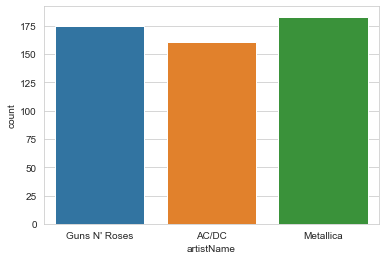

In [59]:
sns.countplot(x='artistName', data=d6)

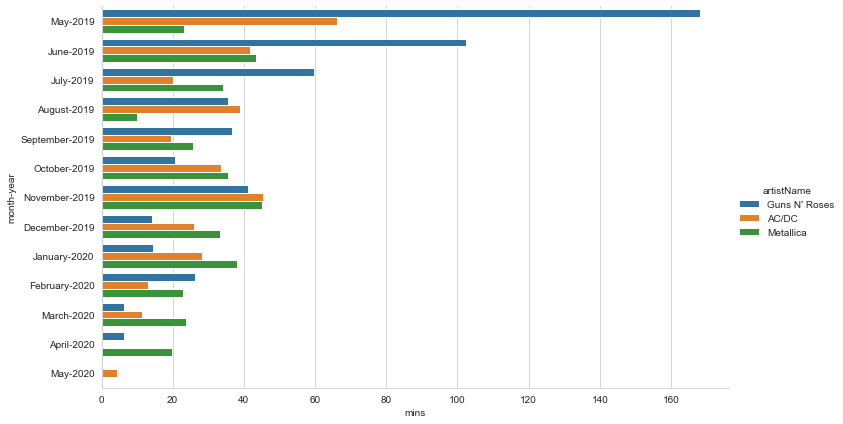

In [68]:
sns.catplot(x='mins', y='month-year', data=d6, kind='bar', height=6, aspect=7/4, estimator=sum, hue='artistName', ci=None)